In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=100,noise=0.25, random_state=2)

In [6]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [7]:
df.head()

,Feature_1,Feature_2
0,1.040513,-0.023349
1,-0.554741,1.270138
2,-0.072372,-0.177901
3,-0.047196,1.218836
4,0.913794,0.859883


In [8]:
df['Target'] = y

In [9]:
df.head()

,Feature_1,Feature_2,Target
0,1.040513,-0.023349,1
1,-0.554741,1.270138,0
2,-0.072372,-0.177901,1
3,-0.047196,1.218836,0
4,0.913794,0.859883,0


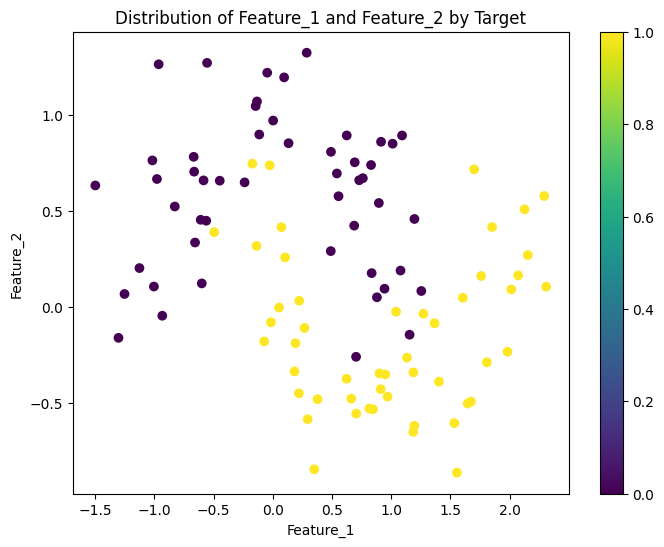

In [11]:
# @title Distribution of Feature_1 and Feature_2 by Target

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Target'], cmap='viridis')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Distribution of Feature_1 and Feature_2 by Target')
_ = plt.colorbar()

In [12]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [13]:
X = df.iloc[:, 0:2].values
y = df.iloc[:,-1].values

In [15]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [16]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.get_weights()

[array([[-0.6317853 , -0.96586347,  0.254655  ],
        [ 0.36489284,  0.9313364 ,  0.37444508]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.56832135],
        [ 0.01790905],
        [-0.26321143]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
initial_weights = model.get_weights()

In [26]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [27]:
initial_weights

[array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([0., 0., 0.]),
 array([[0.],
        [0.],
        [0.]]),
 array([0.])]

In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [32]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6936
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5109 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6938
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5461 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6941
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5148 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6943
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5461 - loss: 0.6928 - val_accuracy: 0.3500 - val_loss: 0.6946
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5422 - loss: 0.6928 - val_accuracy: 0.3500 - val_loss: 0.6949
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5422 - loss: 0.6927 - val_accuracy: 0.3500 - val_loss: 0.6951
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5422 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss

In [33]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.09329199], dtype=float32)]

In [34]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

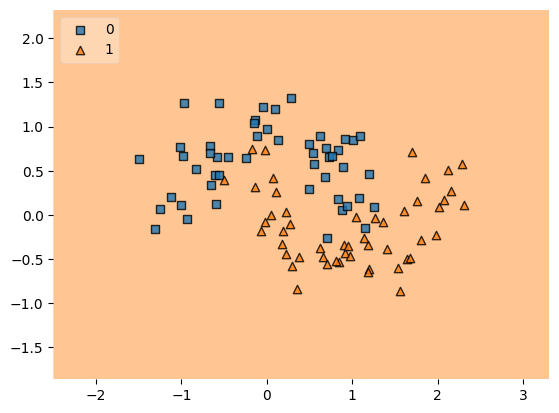

In [35]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)